<a href="https://colab.research.google.com/github/Aboubacar2012/medium_toward_ds_tools/blob/main/Best_Practices_for_Visualizing_Your_Cluster_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Best Practices for Visualizing Your Cluster Results

Doc : https://towardsdatascience.com/best-practices-for-visualizing-your-cluster-results-20a3baac7426

Clustering is one of the most popular techniques in Data Science. Compared to other techniques it is quite easy to understand and apply. However, since clustering is an unsupervised method, it is challenging for you to identify distinct clusters that are comprehensible to your business clients.

#### Goal

This article provides you visualization best practices for your next clustering project. You will learn best practices for analyzing and diagnosing your clustering output, visualizing your clusters properly with PaCMAP dimension reduction, and presenting your cluster’s characteristics. Each visualization comes with its code snippet

#### Cluster selection and diagnoses

Let’s start at the very beginning. Before you analyze any cluster characteristics you have to prepare your data and select a proper clustering algorithm. For the sake of simplicity we will be working with the commonly known wine data set and use a K-Means model. Nevertheless, most of the visualizations shown in this article can be used for any clustering algorithm.

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
X,y=load_wine(return_X_y=True, as_frame=True)

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y[0]

0

In [ ]:
# Scaling is important when working with distance based
# (e.g, euklidian) cluster algorithms
scaler=StandardScaler()
X_std=scaler.fit_transform(X)
# Since the fit_transform() strips the column headers
# we add them after the transformation
X_std=pd.DataFrame(X_std, columns=X.columns)

In [ ]:
X_std.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


The code above loads the wine data set and uses the StandardScaler to scale the whole data set.

To ensure that the later visualizations of our clusters always use the right and same colors, we define a list of six different colors

In [ ]:
# Let's define max. 6 different cluster colors - if you like you can add here more.
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

#### Determine the right number of k clusters 

There are several methods of how to determine (visually) the right number of clusters. In the following we will use the **elbow-plot method**, the (**mean**) **silhouette score** method and the **silhouette analysis**.

#### Elbow method Method

To get a comprehensive and proper visualization of the elbow-plot, I recommend using the yellowbrick package pip install yellowbrick . The following code will produce the plot shown 

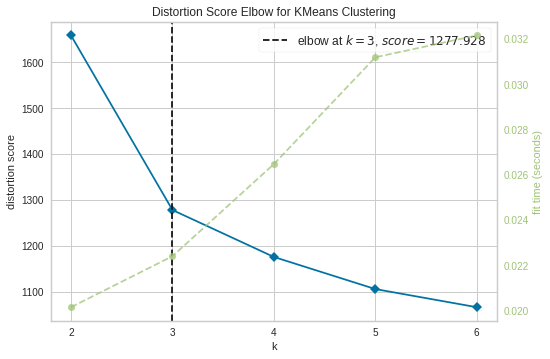

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

fig, ax=plt.subplots()

visualizer=KElbowVisualizer(KMeans(), k=(2, 7), ax=ax)
visualizer.fit(X_std)

ax.set_xticks(range(2,7))
visualizer.show()
#plt.figure(figsize=(10,10))
plt.show()

##### Silhouette score Method

Another way to determine the number of clusters is the silhouette score method.

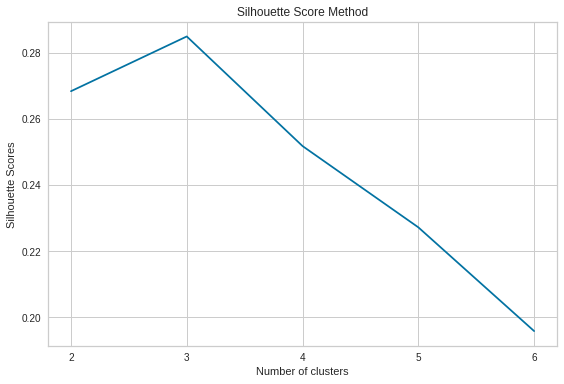

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')
    km.fit(X_std)
    silhouette_scores.append(silhouette_score(X_std, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

#### Silhouette analysis Method

The provided code in the mentioned article plots one silhouette chart per row. However, that can be very unclear when you have a large number of clusters and want to compare their related silhouette charts. Therefore, I wrote the code below to plot three charts per row, which makes the later comparison 

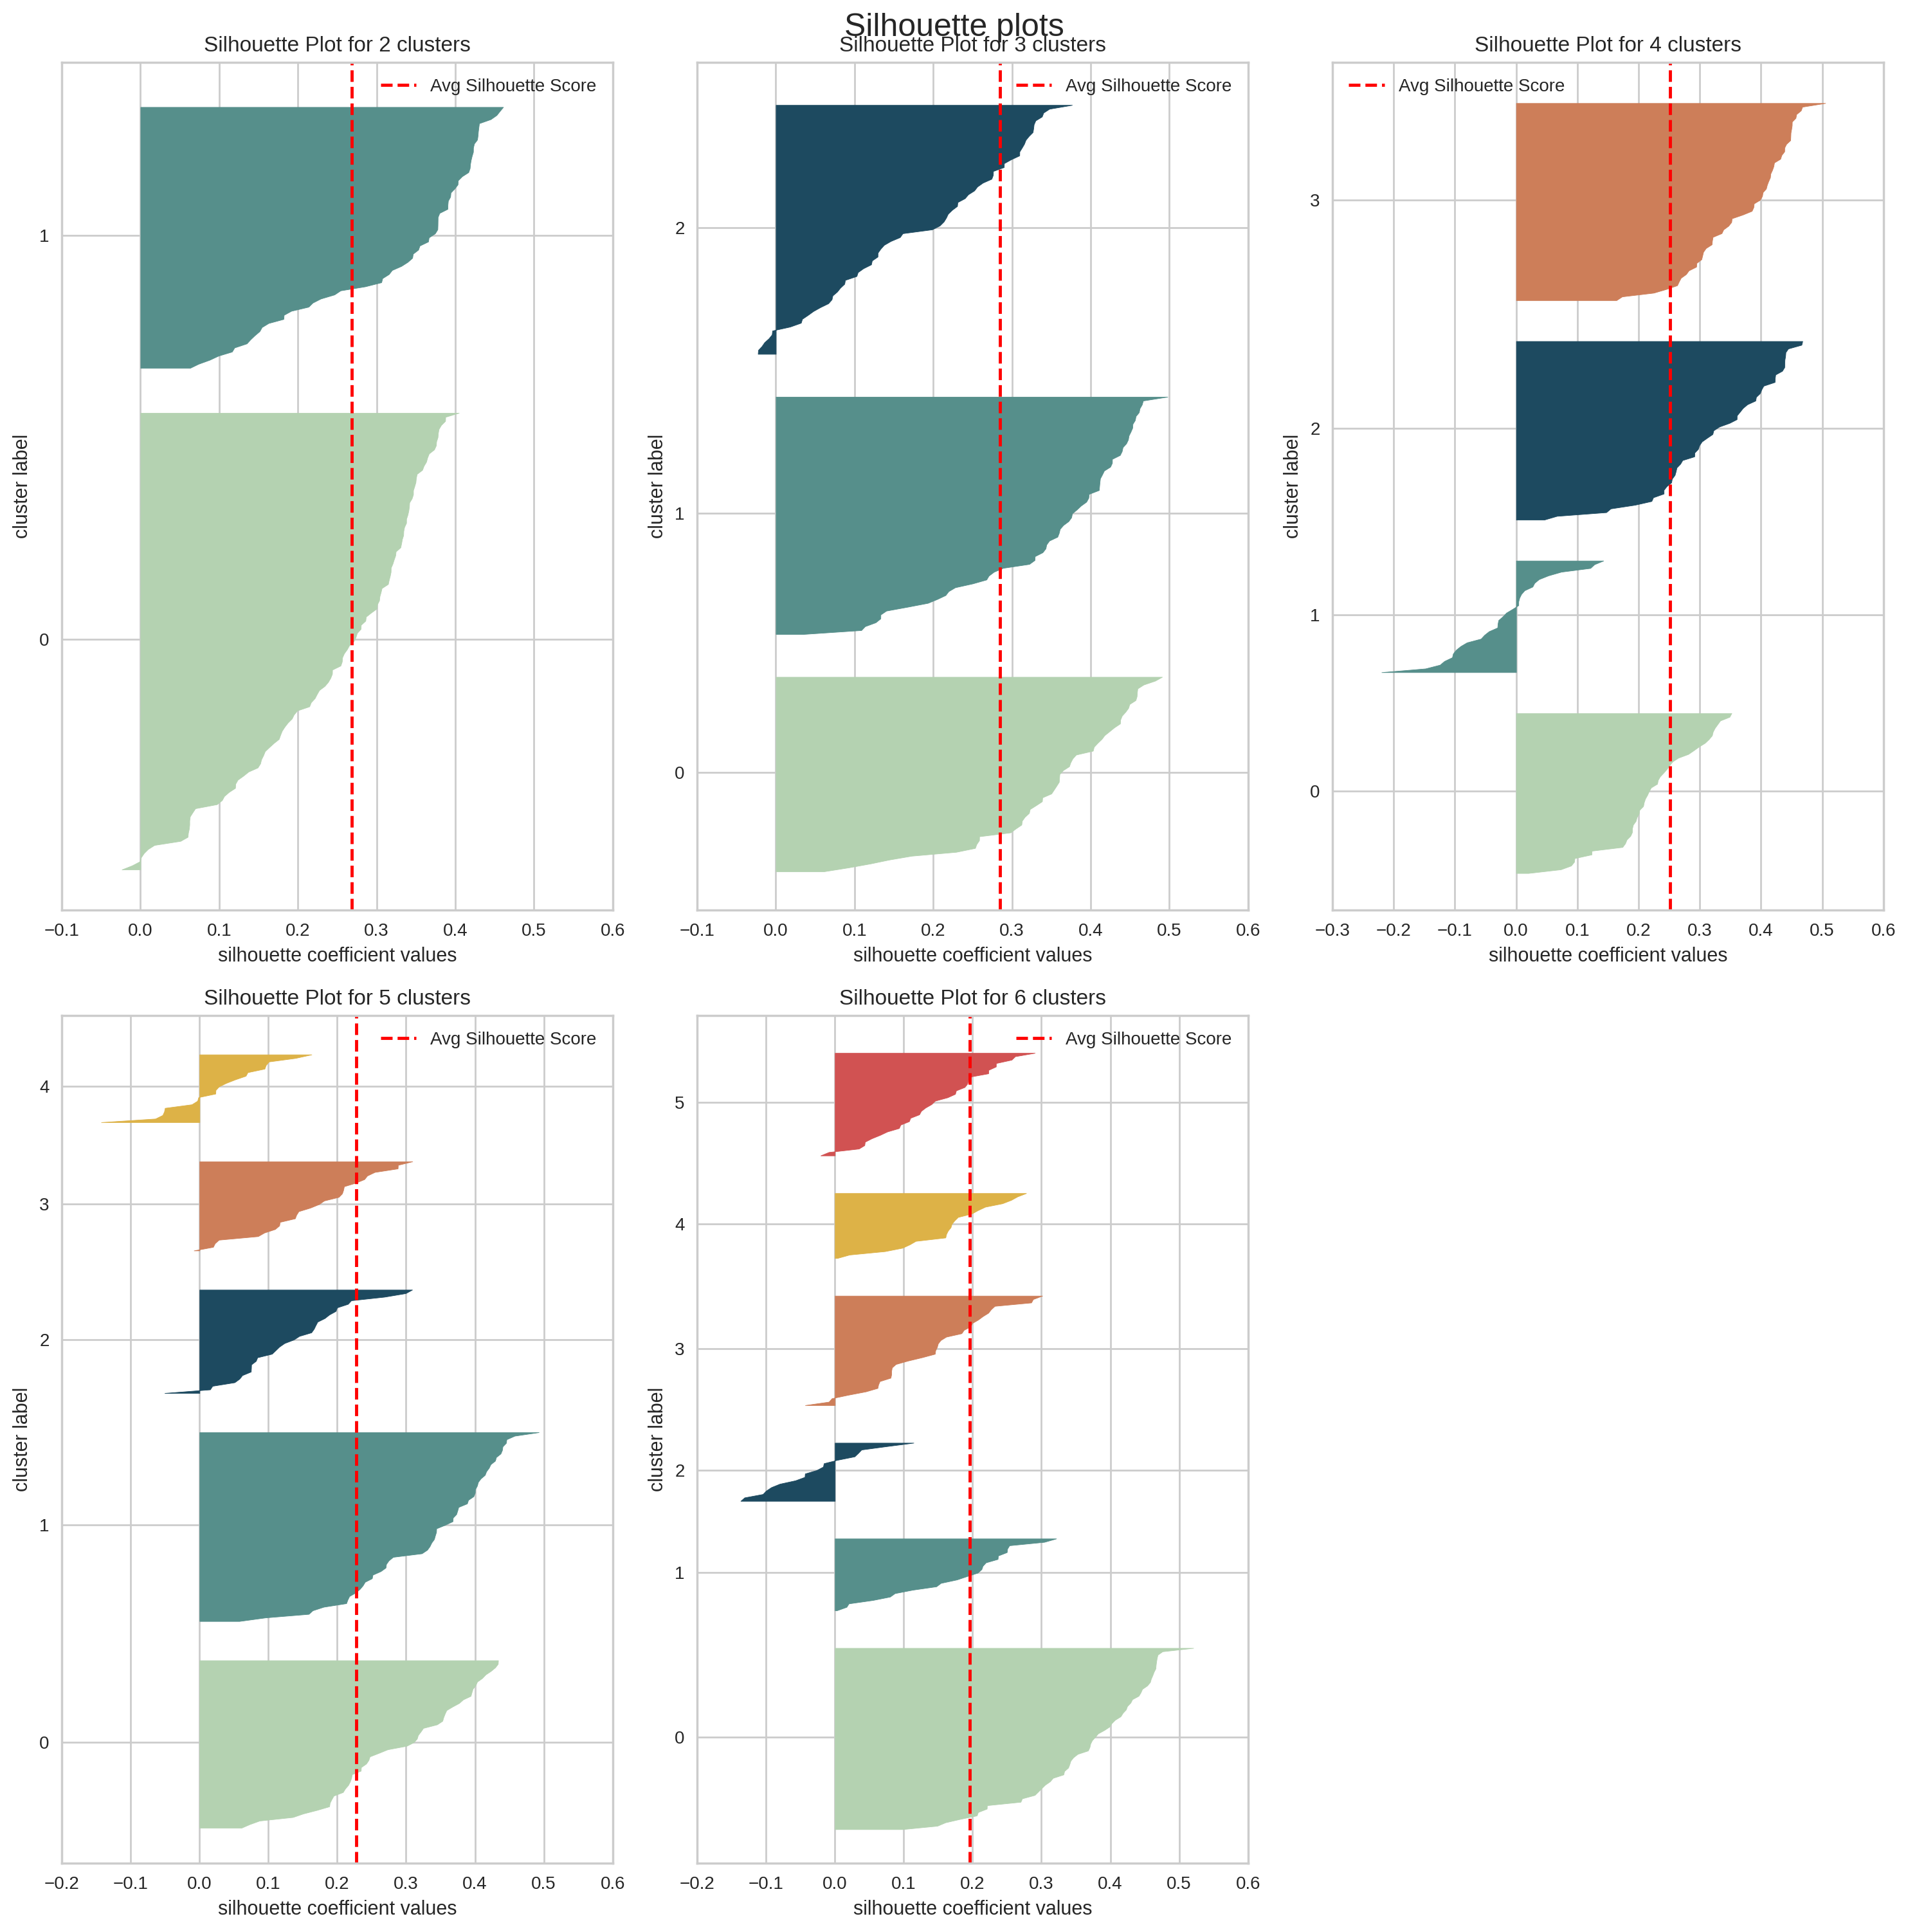

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.ticker as ticker

def silhouette_plot(X, model, ax, colors):
    y_lower = 10
    y_tick_pos_ = []
    sh_samples = silhouette_samples(X, model.labels_)
    sh_score = silhouette_score(X, model.labels_)
    
    for idx in range(model.n_clusters):
        values = sh_samples[model.labels_ == idx]
        values.sort()
        size = values.shape[0]
        y_upper = y_lower + size
        ax.fill_betweenx(np.arange(y_lower, y_upper),0,values,
                         facecolor=colors[idx],edgecolor=colors[idx]
        )
        y_tick_pos_.append(y_lower + 0.5 * size)
        y_lower = y_upper + 10

    ax.axvline(x=sh_score, color="red", linestyle="--", label="Avg Silhouette Score")
    ax.set_title("Silhouette Plot for {} clusters".format(model.n_clusters))
    l_xlim = max(-1, min(-0.1, round(min(sh_samples) - 0.1, 1)))
    u_xlim = min(1, round(max(sh_samples) + 0.1, 1))
    ax.set_xlim([l_xlim, u_xlim])
    ax.set_ylim([0, X.shape[0] + (model.n_clusters + 1) * 10])
    ax.set_xlabel("silhouette coefficient values")
    ax.set_ylabel("cluster label")
    ax.set_yticks(y_tick_pos_)
    ax.set_yticklabels(str(idx) for idx in range(model.n_clusters))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.legend(loc="best")
    return ax


# Plot for multiple ks
k_max = 6
ncols = 3
# calculate number of rows
nrows = k_max // ncols + (k_max % ncols > 0)
# set figure size
fig = plt.figure(figsize=(15,15), dpi=200)

for k in range(2,k_max+1):
    
    # Apply clustering for k clusters
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')

    km_fit = km.fit(X_std)
    
    # create chart
    ax = plt.subplot(nrows, ncols, k-1)
    silhouette_plot(X_std, km_fit,ax, cluster_colors)

fig.suptitle("Silhouette plots", fontsize=18, y=1)
plt.tight_layout()
plt.show()

After trying out several ways to visually determine the right number of k clusters, we decide to continue with k=3 and build our clusters.

In [ ]:
# Final decision
km = KMeans(n_clusters=3, 
            max_iter=300, 
            tol=1e-04, 
            init='k-means++', 
            n_init=10, 
            random_state=42, 
            algorithm='auto')

km_fit = km.fit(X_std)

#### Cluster diagnoses


A next step is to diagnose our clusters in terms of their magnitude and cardinality.

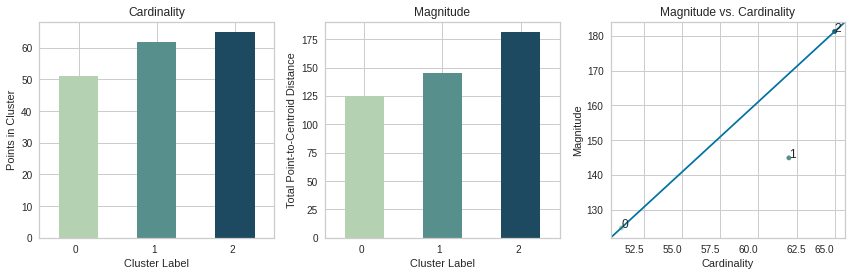

In [ ]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(km_fit.labels_,
                         ax=ax1,
                         title="Cardinality",
                         color=cluster_colors
                        )
plot_cluster_magnitude(X_std,
                       km_fit.labels_,
                       km_fit.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )
plot_magnitude_vs_cardinality(X_std,
                              km_fit.labels_,
                              km_fit.cluster_centers_,
                              euclidean,
                              color=cluster_colors[0:km_fit.n_clusters],
                              ax=ax3, 
                              title="Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

#### Cluster visualization

To visualize our clusters in a 2D space, we need to use **dimension reduction** techniques. A lot of articles and textbooks work with PCA. Recent blog posts also recommend methods like t-SNE or UMAP. However, there are **pitfalls and misunderstandings**

**To keep it short:** There is a trade-off between preserving local and preserving global structure when using these dimension reduction methods. While **PCA preserves global structure,** it does not preserve neighborhoods or local structure. On the other hand, **t-SNE and UMAP preserve local structure** but not the global one.

However, there is a relatively new technique that claims to **preserve local and global structure: PaCMAP.

PCA and PaCMAP will be used in the following to visualize our clusters in a 2D space.

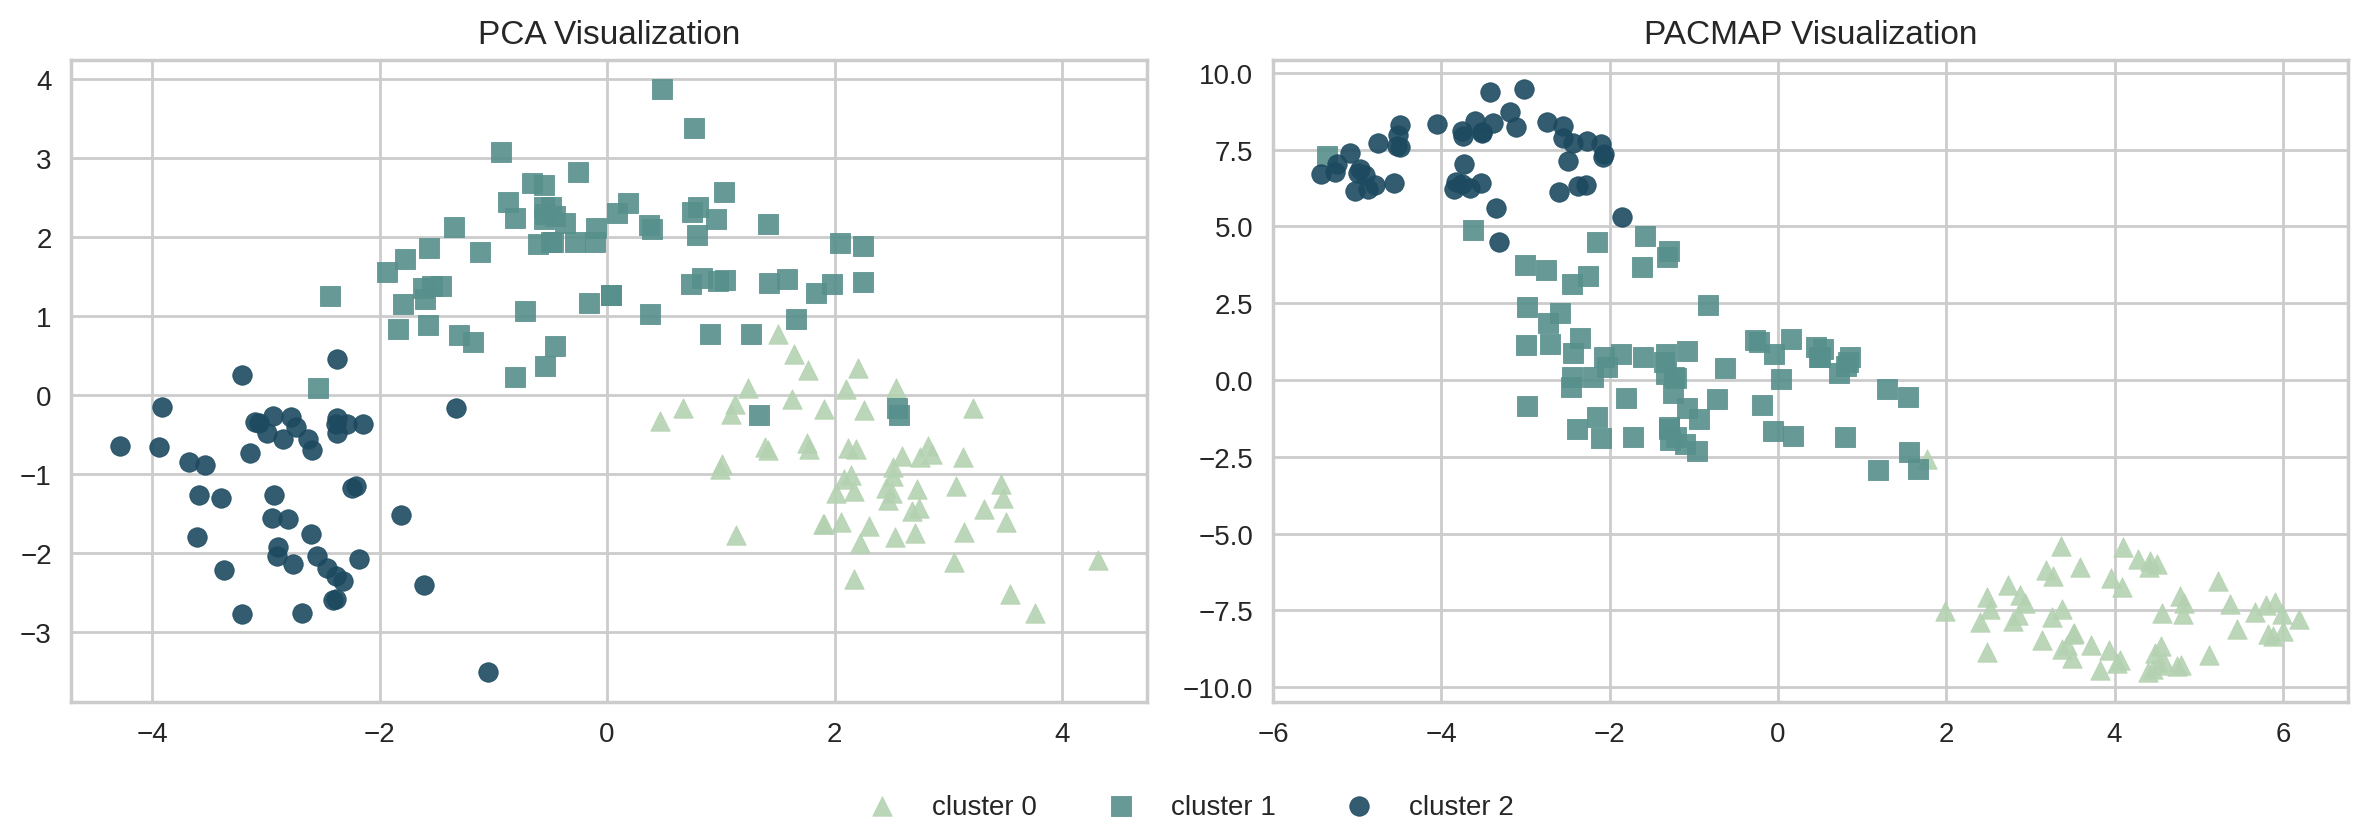

In [ ]:
#Visualizing pca and pacmap
from sklearn.decomposition import PCA
import pacmap

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4), dpi=200)

# PCA
pca_scaled_std = PCA(n_components=2,random_state=42)
X_std_pca = pca_scaled_std.fit_transform(X_std)

for l, c, m in zip(range(0, 3), cluster_colors[0:km_fit.n_clusters], ('^', 's', 'o')):
    ax1.scatter(X_std_pca[y == l, 0],
                X_std_pca[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

# PACMAP
embedding = pacmap.PaCMAP(random_state=42)
X_std_pacmap = embedding.fit_transform(X_std.to_numpy())

for l, c, m in zip(range(0, 3), cluster_colors[0:km_fit.n_clusters], ('^', 's', 'o')):
    ax2.scatter(X_std_pacmap[y == l, 0],
                X_std_pacmap[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )
    
ax1.set_title("PCA Visualization")
ax2.set_title("PACMAP Visualization")

labels = np.unique(km_fit.labels_)
labels = ["cluster "+str(l) for l in labels]
fig.legend(labels, loc='lower center',ncol=len(labels), bbox_transform=(1,0),borderaxespad=-0.5)
plt.tight_layout()
plt.show()

**Cluster characteristics**

Let us focus now on how to visualize and present the key characteristics of each cluster so that a business person can easily understand what each cluster stands for.

Before we do that, we have to enrich our standardized (X_std) and non-standardized (X) data with a cluster column.

In [ ]:
X['cluster'] = km.labels_
X_std['cluster'] = km.labels_

**Boxplots**

A first and very simple approach is to generate one boxplot for **each feature** to show **it’s distribution per cluster**.

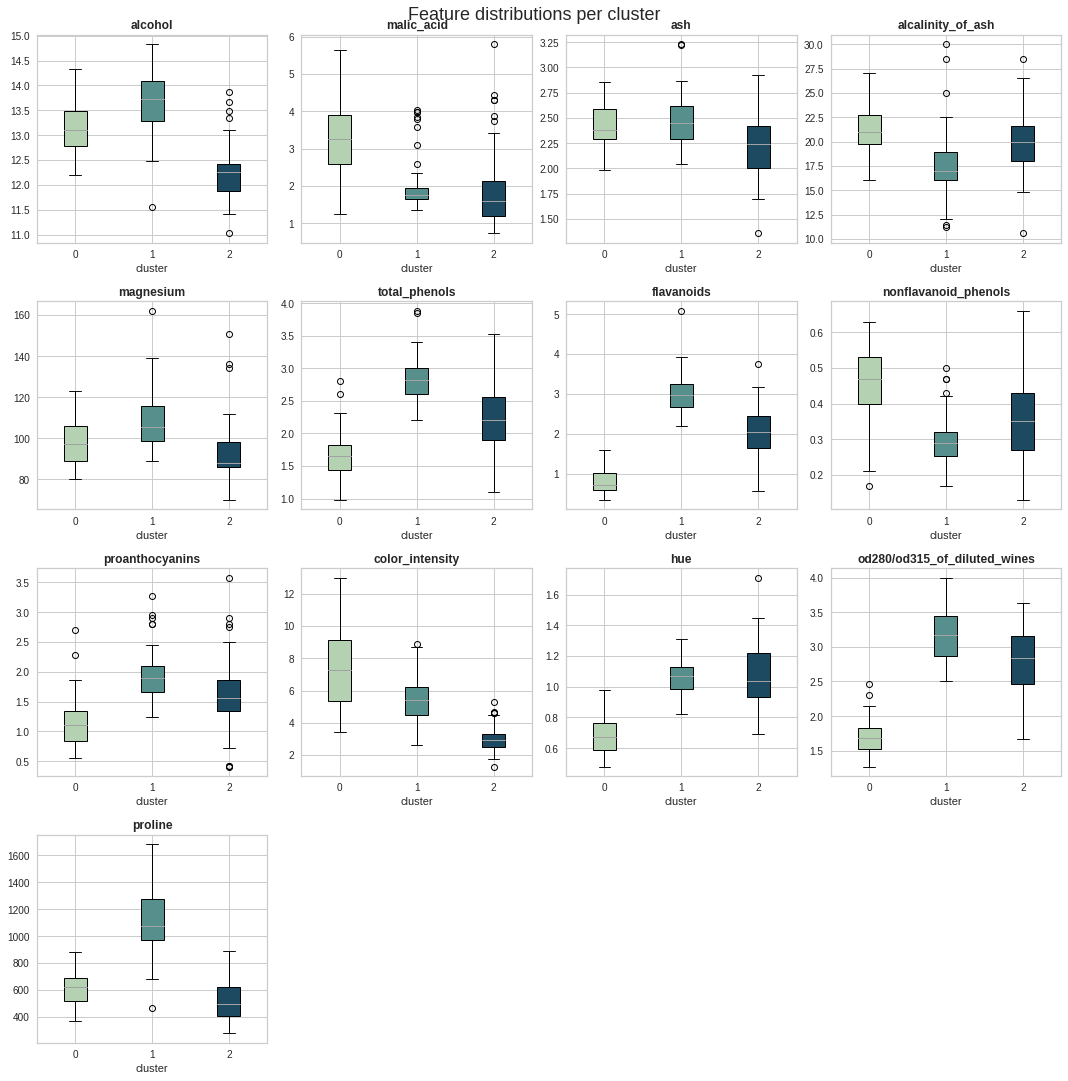

In [ ]:
features = km.feature_names_in_
ncols = 4
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(15,15))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = X[[feature, 'cluster']].boxplot(by='cluster',ax=ax,return_type='both',patch_artist = True)

    for row_key, (ax,row) in box.iteritems():
        ax.set_xlabel('cluster')
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=18, y=1)   
plt.tight_layout()
plt.show()

To plot the outcome fig, we use the non-standardized data X. Using the plotted results of the standardized one (X_std) would be harder to interpret for business users since its scale and units have changed.

**Data preparation**

Before we continue, we have to prepare our data for the following visualizations. The following code helps us to better compare our clusters with each other.

In [ ]:
X_mean = pd.concat([pd.DataFrame(X.mean().drop('cluster'), columns=['mean']), 
                   X.groupby('cluster').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)
X_mean.drop(columns=['mean'], inplace=True)

X_std_mean = pd.concat([pd.DataFrame(X_std.mean().drop('cluster'), columns=['mean']), 
                   X_std.groupby('cluster').mean().T], axis=1)

X_std_dev_rel = X_std_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel.drop(columns=['mean'], inplace=True)
X_std_mean.drop(columns=['mean'], inplace=True)

First, we calculate the **mean for each feature per cluster** (X_mean, X_std_mean), which is quite similar to the boxplots above.

Second, we calculate the **relative differences (in %) of each feature per cluster to the overall average** (cluster-independent) per feature (X_dev_rel, X_std_dev_rel). This helps the reader to see **how large the differences in each cluster are** compared to the overall average of each feature.

In [ ]:
X_mean.head()

,0,1,2
alcohol,13.134118,13.676774,12.250923
malic_acid,3.307255,1.997903,1.897385
ash,2.417647,2.466290,2.231231
alcalinity_of_ash,21.241176,17.462903,20.063077
magnesium,98.666667,107.967742,92.738462


In [ ]:
X_dev_rel.head()

,0,1,2
alcohol,1.0,5.0,-6.0
malic_acid,42.0,-14.0,-19.0
ash,2.0,4.0,-6.0
alcalinity_of_ash,9.0,-10.0,3.0
magnesium,-1.0,8.0,-7.0


In [ ]:
X_std_mean.head()

,0,1,2
alcohol,0.164907,0.835232,-0.926072
malic_acid,0.871547,-0.303810,-0.394042
ash,0.186898,0.364706,-0.494517
alcalinity_of_ash,0.524367,-0.610191,0.170602
magnesium,-0.075473,0.577587,-0.491712


In [ ]:
X_std_dev_rel.head()

,0,1,2
alcohol,-1.913119e+16,-9.689668e+16,1.074352e+17
malic_acid,-1.042788e+18,3.635018e+17,4.714623e+17
ash,-2.158866e+16,-4.212726e+16,5.712173e+16
alcalinity_of_ash,-4.519939e+17,5.259723e+17,-1.470553e+17
magnesium,3.781378e+17,-2.893857e+18,2.463602e+18


Now that we have our data in the right shape, we can continue with our visualizations.

**Bar plots**

To **visualize the relative differences** we can use bar plots. The following code plots the differences per cluster for each feature.

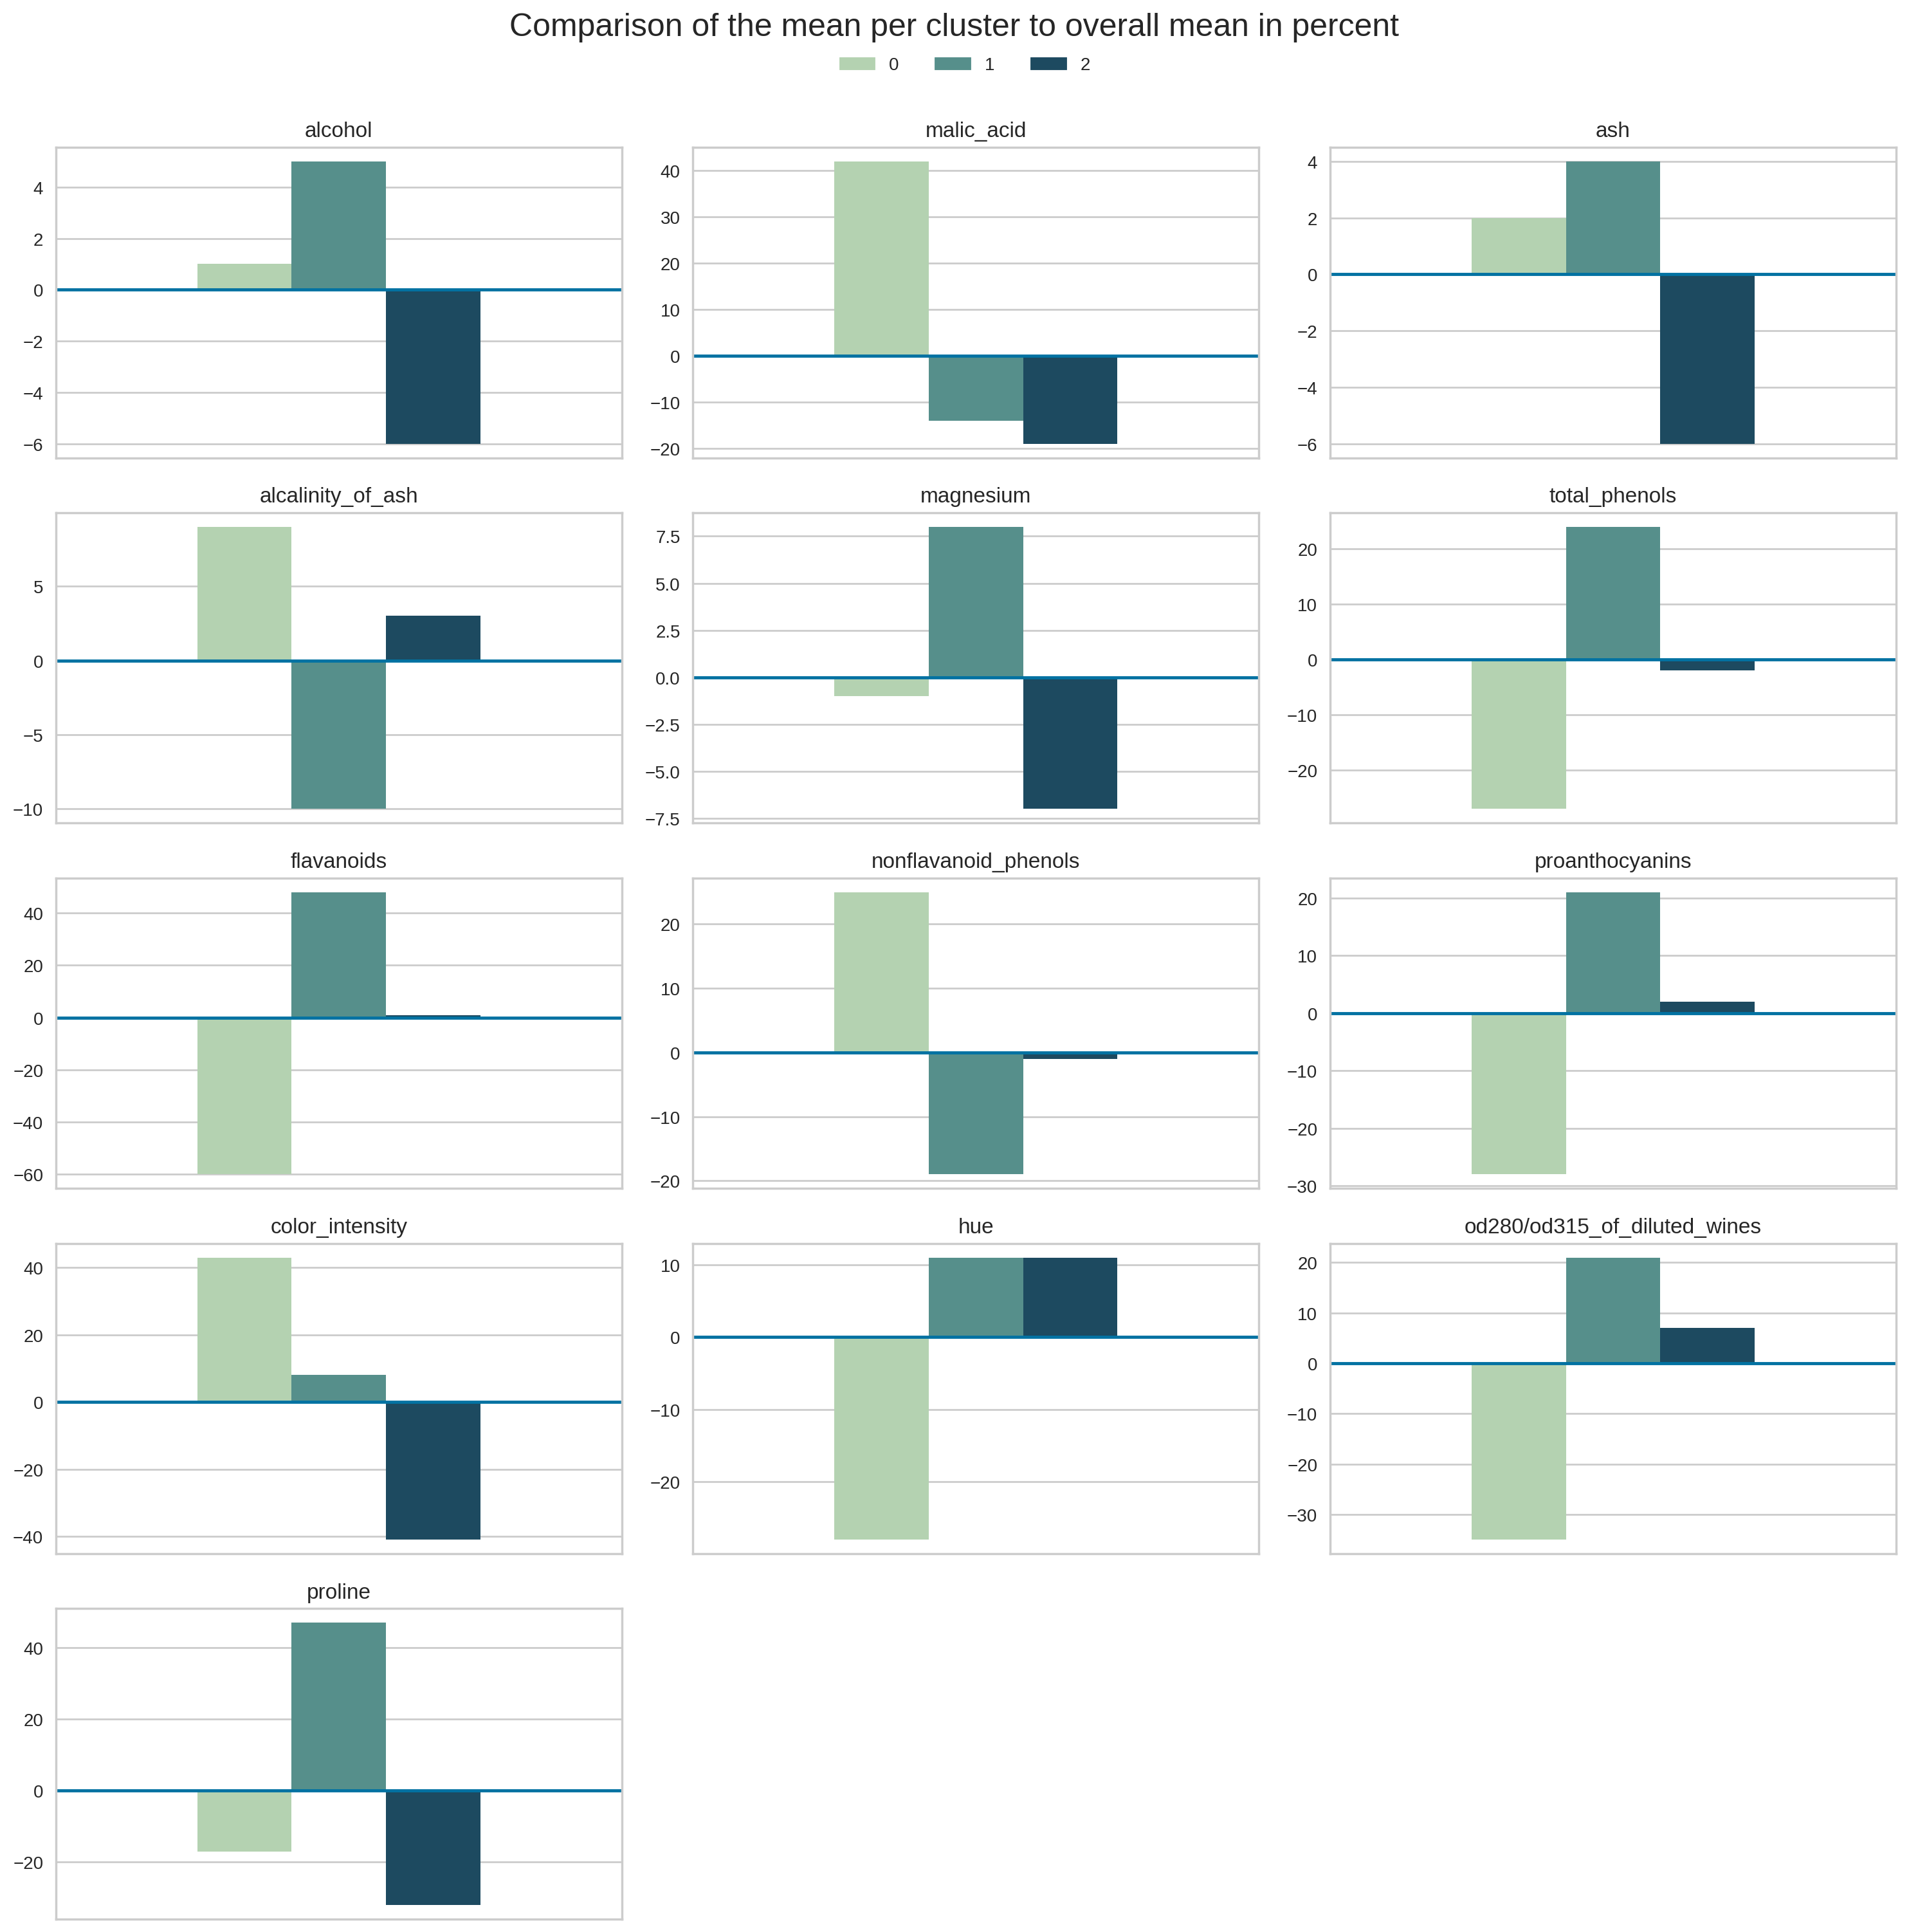

In [ ]:
import matplotlib.patches as mpatches
def cluster_comparison_bar(X_comparison, colors, deviation=True ,title="Cluster results"):
    
    features = X_comparison.index
    ncols = 3
    # calculate number of rows
    nrows = len(features) // ncols + (len(features) % ncols > 0)
    # set figure size
    fig = plt.figure(figsize=(15,15), dpi=200)
    #interate through every feature
    for n, feature in enumerate(features):
        # create chart
        ax = plt.subplot(nrows, ncols, n + 1)
        X_comparison[X_comparison.index==feature].plot(kind='bar', ax=ax, title=feature, 
                                                             color=colors[0:X.cluster.nunique()],
                                                             legend=False
                                                            )
        plt.axhline(y=0)
        x_axis = ax.axes.get_xaxis()
        x_axis.set_visible(False)

    c_labels = X_comparison.columns.to_list()
    c_colors = colors[0:3]
    mpats = [mpatches.Patch(color=c, label=l) for c,l in list(zip(colors[0:X.cluster.nunique()],
                                                                  X_comparison.columns.to_list()))]

    fig.legend(handles=mpats,
               ncol=ncols,
               loc="upper center",
               fancybox=True,
               bbox_to_anchor=(0.5, 0.98)
              )
    axes = fig.get_axes()
    
    fig.suptitle(title, fontsize=18, y=1)
    #fig.set_ylabel('Deviation from overall mean in %')
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
cluster_comparison_bar(X_dev_rel, cluster_colors, title="Comparison of the mean per cluster to overall mean in percent")


The plots above are great if you want to show the **very details of each cluster.** However, in many cases it also makes sense to **summarize all the relevant results and characteristics in one chart.** The solution below is one way to do that.

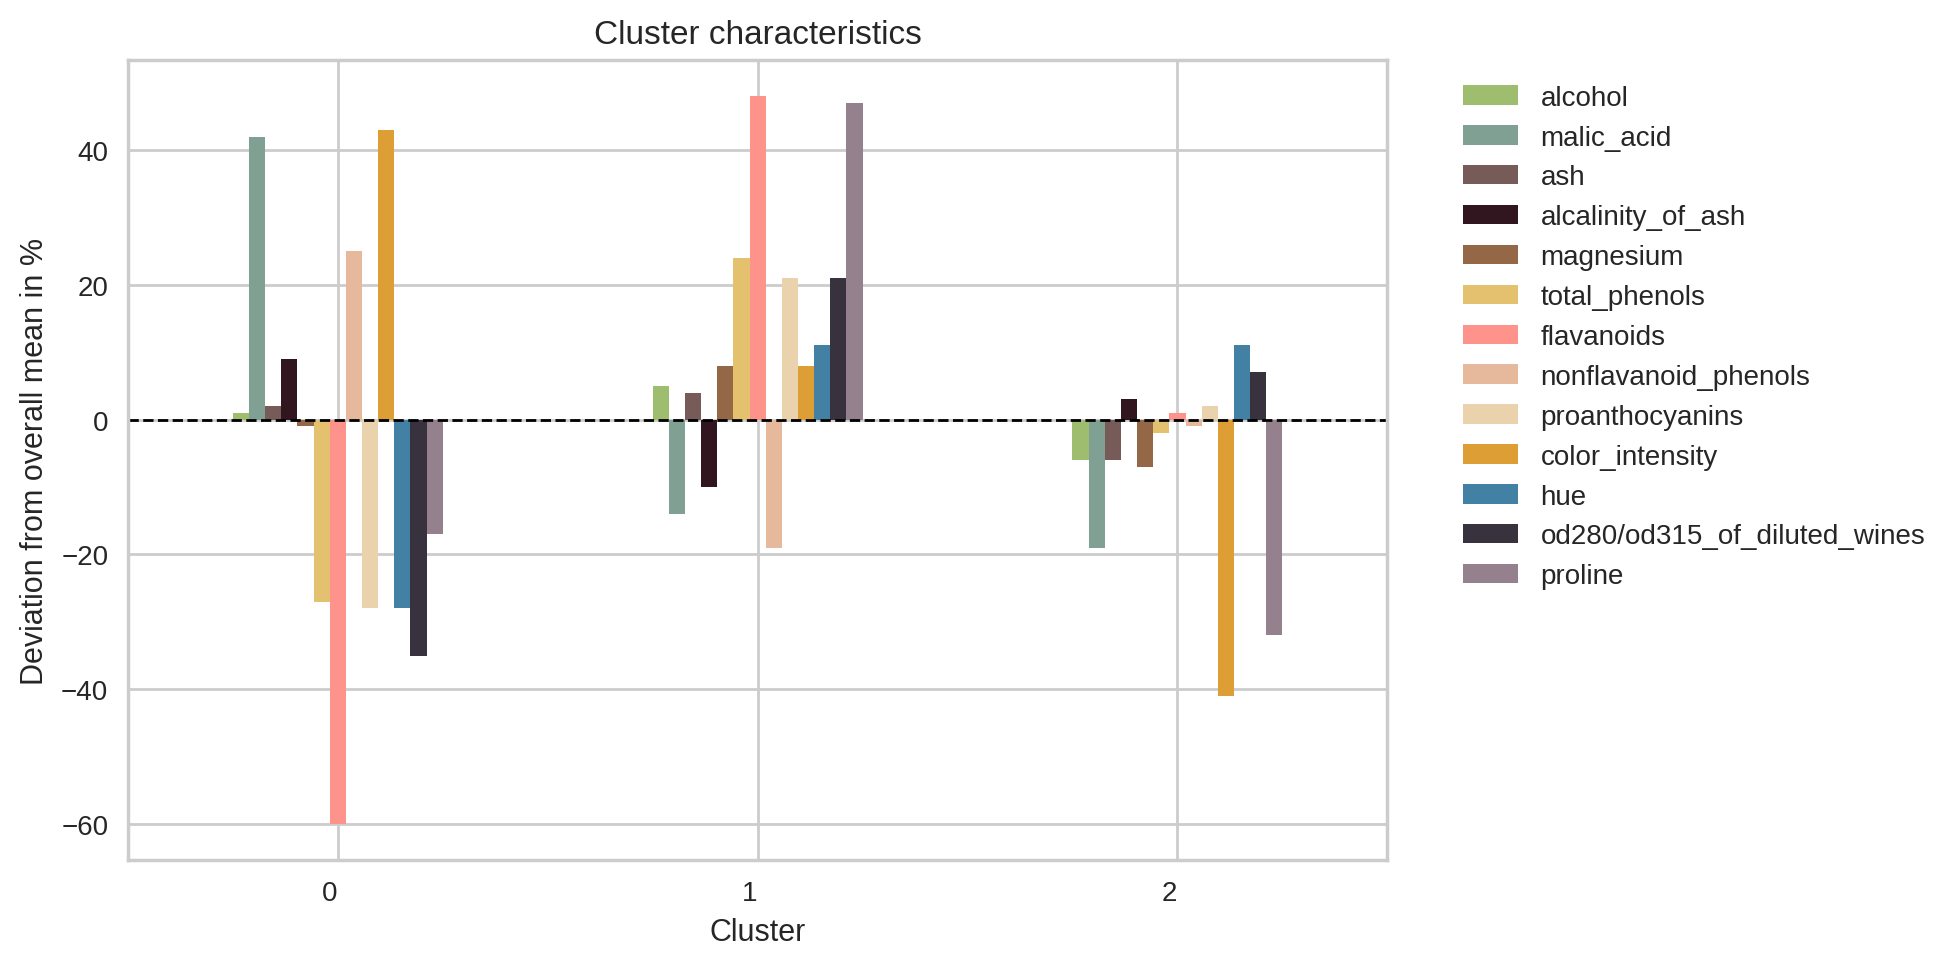

In [ ]:
colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]

fig = plt.figure(figsize=(10,5), dpi=200)
X_dev_rel.T.plot(kind='bar', 
                       ax=fig.add_subplot(), 
                       title="Cluster characteristics", 
                       color=colors,
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

We visualize in figure 10 the relative deviation of each feature from its overall average per cluster.

**Radar chart**

Another way of **summarizing all the relevant information in one plot** is to use a **radar chart.** The code below plots the calculated means of our standardized data (X_std_mean).

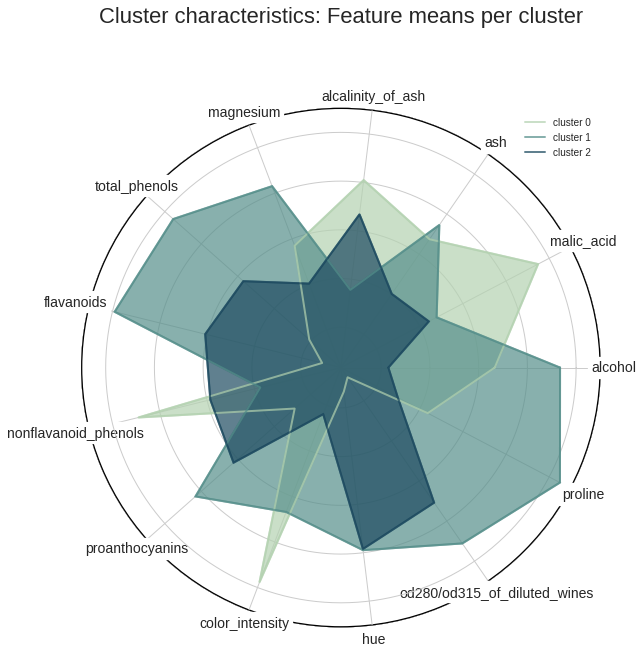

In [ ]:
class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)
        
        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])
        
        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)
                     
    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)

fig = plt.figure(figsize=(8, 8))
no_features = len(km.feature_names_in_)
radar = Radar(fig, km.feature_names_in_, np.unique(km.labels_))

for k in range(0,km.n_clusters):
    cluster_data = X_std_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()

If we use the **non-standardized version,** the different scales would **crash the visualization** (e.g., the mean of proline is much higher than the one for ash). Therefore, I recommend plotting values with the **same unit or at least within similar value ranges.**

**Conclusion**

The goal of this article was to provide you with best practices in cluster diagnoses, visualization, and explanation. Consider PaCMAP when plotting your clusters in a 2D space. The cluster results or characteristics can be presented from different viewpoints. One idea is to show the mean value of each feature per cluster. Another option is to calculate the relative differences of each variable per cluster to the overall mean per feature. When presenting your results to the business, it’s better use one plot (e.g., the shown radar chart or second bar chart). You can use the multiple plots in case you want to investigate the characteristics of each feature per cluster (e.g., for deep-dive sessions with the UX designers).